In [ ]:
!pip install pygame

In [1]:
from models.DeepCNNModel import DeepCNNModel
from models.RandomModel import RandomModel
from models.HeuristicModel import HeuristicModel
from train_cnn import train_deepcnn_model
import fsutils as fs

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# training params
FRAME_SKIP = 4
UPDATE_FREQ = FRAME_SKIP
TARGET_NET_SYNC_FREQ = 1000
MAX_EPS = 250
MAX_STEPS_PER_EP = 1000

# CNN hyperparams
TAU = 4
GAMMA = 0.95
EPS_START = 1.0
EPS_END = 0.05
EPS_DECAY_WINDOW = 50
REPLAY_BUF_CAPACITY = 10000
REPLAY_BUF_PREFILL_AMT = 2000
LR = 0.001
DOWNSAMPLE_SIZE = (112, 112)
BATCH_SIZE = 32

NUM_RAND_ADVERSARIES = 3
NUM_HEURISTIC_ADVERSARIES = 3

In [3]:
cnn_model = DeepCNNModel(tau=TAU, gamma=GAMMA, eps_start=EPS_START, eps_end=EPS_END,
                            eps_decay_window=EPS_DECAY_WINDOW, replay_buf_capacity=REPLAY_BUF_CAPACITY,
                            replay_buf_prefill_amt=REPLAY_BUF_PREFILL_AMT, lr=LR,
                            downsample_size=DOWNSAMPLE_SIZE, batch_size=BATCH_SIZE)
cnn_model_name = 'dqn_cnn_dan_run_enemies_from_scratch_250ep'

adversary_models = []
for i in range(NUM_RAND_ADVERSARIES):
    adversary_models.append(RandomModel(min_steps=5, max_steps=10))
for i in range(NUM_HEURISTIC_ADVERSARIES):
    adversary_models.append(HeuristicModel())

Filling replay buffer to 20.0% capacity...
Replay buffer filled with 2000 samples!
Beginning training...
=== Starting Episode 0 ===
Step 0
Ep Score: 3.9948 | Mean Score: 3.9948 | Steps Survived: 28 | Mean Steps Survived: 28.00
Mean Ep Loss: 0.0999 | Ep Reward: 3.8494 | Mean Reward: 3.9948
Model has been training for 6.2765 minutes.
=== Starting Episode 1 ===
Step 250
Step 500
Step 750
Step 1000
Ep Score: 76.0672 | Mean Score: 40.0310 | Steps Survived: 1000 | Mean Steps Survived: 514.00
Mean Ep Loss: 1.3338 | Ep Reward: 66.3190 | Mean Reward: 40.0310
Model has been training for 11.3402 minutes.
=== Starting Episode 2 ===
Step 1250
Step 1500
Step 1750
Step 2000
Ep Score: 10.5987 | Mean Score: 30.2202 | Steps Survived: 1000 | Mean Steps Survived: 676.00
Mean Ep Loss: 2.3394 | Ep Reward: 10.4947 | Mean Reward: 30.2202
Model has been training for 16.3729 minutes.
=== Starting Episode 3 ===
Ep Score: 2.5313 | Mean Score: 23.2980 | Steps Survived: 38 | Mean Steps Survived: 516.50
Mean Ep Loss

Step 13000
Step 13250
Ep Score: 137.4267 | Mean Score: 42.6753 | Steps Survived: 1000 | Mean Steps Survived: 571.70
Mean Ep Loss: 7.2338 | Ep Reward: 132.5269 | Mean Reward: 42.6753
Model has been training for 73.1158 minutes.
=== Starting Episode 34 ===
Step 13500
Step 13750
Step 14000
Step 14250
Ep Score: 287.0267 | Mean Score: 61.0637 | Steps Survived: 1000 | Mean Steps Survived: 571.70
Mean Ep Loss: 8.9633 | Ep Reward: 285.4771 | Mean Reward: 61.0637
Model has been training for 78.0595 minutes.
=== Starting Episode 35 ===
Step 14500
Step 14750
Step 15000
Step 15250
Ep Score: 272.9056 | Mean Score: 87.9581 | Steps Survived: 1000 | Mean Steps Survived: 668.30
Mean Ep Loss: 4.5322 | Ep Reward: 262.4083 | Mean Reward: 87.9581
Model has been training for 82.8554 minutes.
=== Starting Episode 36 ===
Step 15500
Ep Score: 80.9940 | Mean Score: 94.5154 | Steps Survived: 251 | Mean Steps Survived: 649.20
Mean Ep Loss: 19.6408 | Ep Reward: 79.7672 | Mean Reward: 94.5154
Model has been trainin

Step 28500
Ep Score: 5.6184 | Mean Score: 46.5315 | Steps Survived: 62 | Mean Steps Survived: 399.90
Mean Ep Loss: 0.2862 | Ep Reward: 5.6118 | Mean Reward: 46.5315
Model has been training for 149.0429 minutes.
=== Starting Episode 67 ===
Step 28750
Step 29000
Step 29250
Step 29500
Ep Score: 35.0493 | Mean Score: 34.0434 | Steps Survived: 1000 | Mean Steps Survived: 404.60
Mean Ep Loss: 7.9154 | Ep Reward: 33.5158 | Mean Reward: 34.0434
Model has been training for 154.2582 minutes.
=== Starting Episode 68 ===
Step 29750
Step 30000
Step 30250
Step 30500
Ep Score: 521.3298 | Mean Score: 85.5860 | Steps Survived: 1000 | Mean Steps Survived: 484.90
Mean Ep Loss: 8.5798 | Ep Reward: 517.4742 | Mean Reward: 85.5860
Model has been training for 159.5455 minutes.
=== Starting Episode 69 ===
Ep Score: 4.7823 | Mean Score: 86.0643 | Steps Survived: 29 | Mean Steps Survived: 487.70
Mean Ep Loss: 21.8971 | Ep Reward: 4.7556 | Mean Reward: 86.0643
Model has been training for 159.7000 minutes.
=== St

Ep Score: 15.1068 | Mean Score: 54.0750 | Steps Survived: 213 | Mean Steps Survived: 456.20
Mean Ep Loss: 24.0988 | Ep Reward: 14.9639 | Mean Reward: 54.0750
Model has been training for 224.4503 minutes.
=== Starting Episode 100 ===
Step 43250
Ep Score: 107.6745 | Mean Score: 63.7453 | Steps Survived: 139 | Mean Steps Survived: 451.70
Mean Ep Loss: 16.0846 | Ep Reward: -74.8786 | Mean Reward: 63.7453
Model has been training for 225.1744 minutes.
=== Starting Episode 101 ===
Step 43500
Ep Score: 4.7580 | Mean Score: 39.5029 | Steps Survived: 223 | Mean Steps Survived: 420.40
Mean Ep Loss: 16.2950 | Ep Reward: 4.1833 | Mean Reward: 39.5029
Model has been training for 226.3053 minutes.
=== Starting Episode 102 ===
Step 43750
Step 44000
Step 44250
Step 44500
Ep Score: 29.5360 | Mean Score: 41.3853 | Steps Survived: 1000 | Mean Steps Survived: 470.30
Mean Ep Loss: 11.6550 | Ep Reward: 22.9881 | Mean Reward: 41.3853
Model has been training for 231.5041 minutes.
=== Starting Episode 103 ===
E

Step 54500
Step 54750
Step 55000
Step 55250
Ep Score: 106.2564 | Mean Score: 47.6796 | Steps Survived: 1000 | Mean Steps Survived: 532.60
Mean Ep Loss: 7.9882 | Ep Reward: 98.7913 | Mean Reward: 47.6796
Model has been training for 286.2920 minutes.
=== Starting Episode 134 ===
Step 55500
Step 55750
Ep Score: 91.6513 | Mean Score: 56.8448 | Steps Survived: 294 | Mean Steps Survived: 561.90
Mean Ep Loss: 12.3067 | Ep Reward: 88.9188 | Mean Reward: 56.8448
Model has been training for 287.7048 minutes.
=== Starting Episode 135 ===
Ep Score: 11.8396 | Mean Score: 56.8750 | Steps Survived: 160 | Mean Steps Survived: 477.90
Mean Ep Loss: 23.7761 | Ep Reward: 11.6728 | Mean Reward: 56.8750
Model has been training for 288.4658 minutes.
=== Starting Episode 136 ===
Step 56000
Step 56250
Step 56500
Step 56750
Ep Score: 8.0469 | Mean Score: 47.3726 | Steps Survived: 1000 | Mean Steps Survived: 477.90
Mean Ep Loss: 2.9429 | Ep Reward: -2.0759 | Mean Reward: 47.3726
Model has been training for 293.2

Ep Score: 7.3816 | Mean Score: 31.9215 | Steps Survived: 95 | Mean Steps Survived: 182.40
Mean Ep Loss: 2.1311 | Ep Reward: 7.3043 | Mean Reward: 31.9215
Model has been training for 354.0799 minutes.
=== Starting Episode 167 ===
Step 69500
Ep Score: 3.4359 | Mean Score: 21.3151 | Steps Survived: 75 | Mean Steps Survived: 168.90
Mean Ep Loss: 1.2245 | Ep Reward: 3.3942 | Mean Reward: 21.3151
Model has been training for 354.4432 minutes.
=== Starting Episode 168 ===
Step 69750
Step 70000
Step 70250
Ep Score: 19.8049 | Mean Score: 22.0364 | Steps Survived: 752 | Mean Steps Survived: 233.80
Mean Ep Loss: 6.5697 | Ep Reward: 19.6556 | Mean Reward: 22.0364
Model has been training for 357.9903 minutes.
=== Starting Episode 169 ===
Ep Score: 4.4677 | Mean Score: 21.9101 | Steps Survived: 87 | Mean Steps Survived: 230.60
Mean Ep Loss: 6.7269 | Ep Reward: 4.0597 | Mean Reward: 21.9101
Model has been training for 358.4029 minutes.
=== Starting Episode 170 ===
Step 70500
Step 70750
Step 71000
Step

Step 81500
Step 81750
Step 82000
Step 82250
Ep Score: 8.3984 | Mean Score: 85.2221 | Steps Survived: 1000 | Mean Steps Survived: 436.20
Mean Ep Loss: 15.2365 | Ep Reward: 4.1912 | Mean Reward: 85.2221
Model has been training for 412.9155 minutes.
=== Starting Episode 201 ===
Ep Score: 111.7569 | Mean Score: 79.0654 | Steps Survived: 182 | Mean Steps Survived: 354.40
Mean Ep Loss: 23.1756 | Ep Reward: -69.9606 | Mean Reward: 79.0654
Model has been training for 413.7338 minutes.
=== Starting Episode 202 ===
Ep Score: 0.0000 | Mean Score: 74.9714 | Steps Survived: 1 | Mean Steps Survived: 254.50
Mean Ep Loss: 1.1815 | Ep Reward: 0.0000 | Mean Reward: 74.9714
Model has been training for 413.7445 minutes.
=== Starting Episode 203 ===
Step 82500
Step 82750
Ep Score: 81.1300 | Mean Score: 83.0844 | Steps Survived: 316 | Mean Steps Survived: 282.60
Mean Ep Loss: 11.7247 | Ep Reward: 78.3975 | Mean Reward: 83.0844
Model has been training for 415.1706 minutes.
=== Starting Episode 204 ===
Step 8

Step 97500
Ep Score: 10.2315 | Mean Score: 5.1578 | Steps Survived: 128 | Mean Steps Survived: 227.50
Mean Ep Loss: 0.4056 | Ep Reward: 10.0287 | Mean Reward: 5.1578
Model has been training for 482.8762 minutes.
=== Starting Episode 234 ===
Step 97750
Step 98000
Step 98250
Step 98500
Ep Score: 103.7019 | Mean Score: 15.2672 | Steps Survived: 1000 | Mean Steps Survived: 320.70
Mean Ep Loss: 5.7064 | Ep Reward: -64.3653 | Mean Reward: 15.2672
Model has been training for 487.9531 minutes.
=== Starting Episode 235 ===
Ep Score: 2.8064 | Mean Score: 14.6195 | Steps Survived: 36 | Mean Steps Survived: 310.90
Mean Ep Loss: 0.7339 | Ep Reward: 2.5981 | Mean Reward: 14.6195
Model has been training for 488.1316 minutes.
=== Starting Episode 236 ===
Ep Score: 1.5940 | Mean Score: 14.3979 | Steps Survived: 128 | Mean Steps Survived: 223.70
Mean Ep Loss: 0.7604 | Ep Reward: 1.1493 | Mean Reward: 14.3979
Model has been training for 488.7565 minutes.
=== Starting Episode 237 ===
Step 98750
Ep Score: 

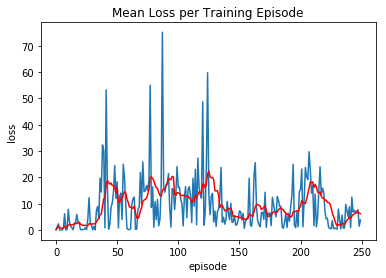

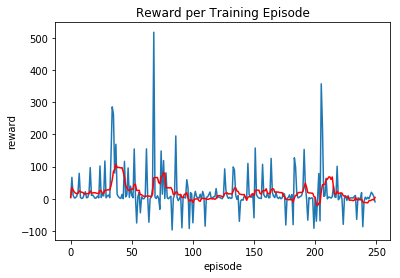

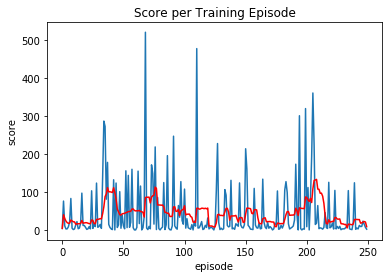

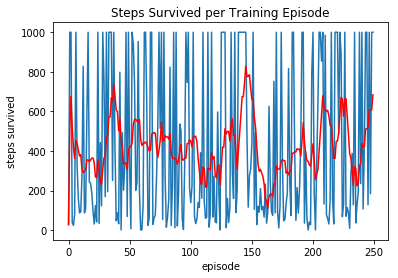

In [4]:
train_deepcnn_model(cnn_model, cnn_model_name, adversary_models, frame_skip=FRAME_SKIP, update_freq=UPDATE_FREQ,
                    target_net_sync_freq=TARGET_NET_SYNC_FREQ, max_eps=MAX_EPS, max_steps_per_ep=MAX_STEPS_PER_EP,
                    prefill_buffer=True)